In [1]:
from __future__ import division
from __future__ import print_function

import torch
import _init_paths
import os
from models.networks.hr_net_multi import get_hr_net
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# os.environ["CUDA_VISIBLE_DEVICES"]="2"
# import torch
# import torch.utils.data
# from opts import opts
# from models.model import create_model, load_model, save_model
# from models.data_parallel import DataParallel
# from logger import Logger
# from datasets.dataset_factory import get_dataset
# from trains.train_factory import train_factory
# from obj_spec import multi_data

In [2]:
heads = {'hm_small': 1,
             'wh_small': 2,
             'hm_norm':1,
         'wh_norm':2
             }
arch='hrnet_18'
head_conv=64
net=get_hr_net(num_layers=18,heads=heads,head_conv=head_conv)

conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
conv2.weight
bn2.weight
bn2.bias
bn2.running_mean
bn2.running_var
bn2.num_batches_tracked
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.num_batches_tracked
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.num_batches_tracked
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.bn3.running_mean
layer1.0.bn3.running_var
layer1.0.bn3.num_batches_tracked
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.0.downsample.1.running_mean
layer1.0.downsample.1.running_var
layer1.0.downsample.1.num_batches_tracked
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.num_batches_tracked
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1

pretrain: 
conv1.weight False
bn1.weight False
bn1.bias False
conv2.weight False
bn2.weight False
bn2.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.downsample.0.weight False
layer1.0.downsample.1.weight False
layer1.0.downsample.1.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
transition1.0.0.weight False
transition1.0.1.weight False
transition1.0.1.bias False
transition1.1.0.0.weight False
transition1.1.0.1.weight False
transition1.1.0.1.bias False
stage2.0.branches.0.0.conv1.weight False
stage2.0.branches.0.0.bn1.weight False
stage2.0.branches.0.0.bn1.bias False
stage2.0.branches.0.0.c

grad:


In [3]:
params=torch.load('/home/mayx/project/CenterNet/models/model_60.pth')
print(params['epoch'])
net.load_state_dict(params['state_dict'])
model=net.cuda()
model.eval()

60


HighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (relu): ReLU()
      (dow

In [4]:
from datasets.dataset_factory import get_dataset
Dataset = get_dataset('wider', 'fadet')
def default_collate(batches):
    batch_hm=[]
    batch_wh=[]
    batch_offset=[]
    batch_mask=[]
    for i in range(4):
        batch_hm.append([])
        batch_offset.append([])
        batch_wh.append([])
        batch_mask.append([])
    for batch in batches:
        for i in range(4):
            batch_hm[i].append(batch['hm'][i])
            batch_wh[i].append(batch['wh'][i])
            batch_offset[i].append(batch['offset'][i])
            batch_mask[i].append(batch['mask'][i])
    batch=dict()
    batch['hm']=[torch.tensor(i) for i in batch_hm]
    batch['wh']=[torch.tensor(i) for i in batch_wh]
    batch['offset']=[torch.tensor(i) for i in batch_offset]
    batch['mask']=[torch.tensor(i) for i in batch_mask]
    data=[i['input'] for i in batches]
    batch['input']=torch.stack([i['input'] for i in batches],0)
    return batch
val_loader = torch.utils.data.DataLoader(
    Dataset(None, 'val'),
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
#     collate_fn=default_collate
)
train_loader = torch.utils.data.DataLoader(
    Dataset(None, 'train'),
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
#     collate_fn=default_collate
)

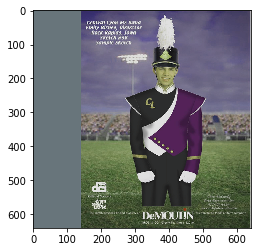

torch.Size([1, 1, 160, 160])


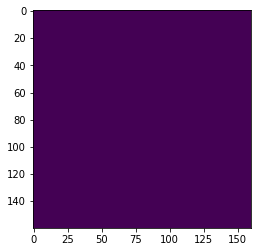

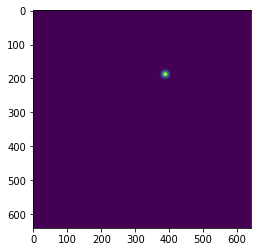

(0, 3)


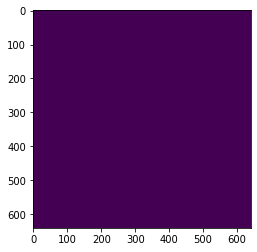

s


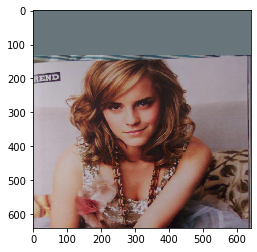

torch.Size([1, 1, 160, 160])


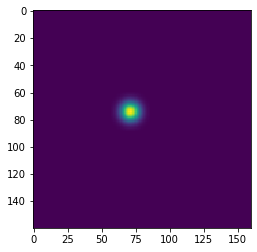

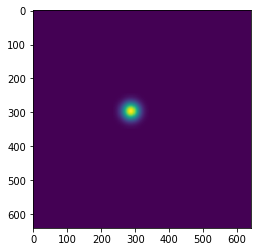

(1, 3)


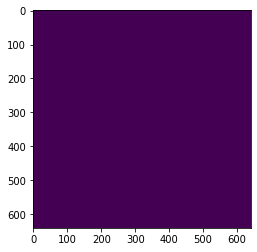

w is  tensor(0.3363)
h is  tensor(0.3614)
s


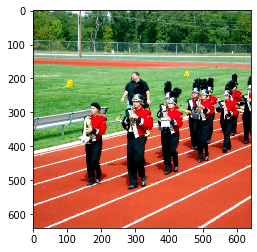

torch.Size([1, 1, 160, 160])


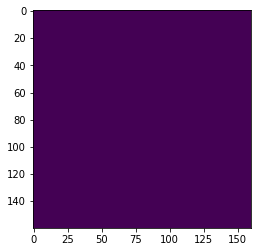

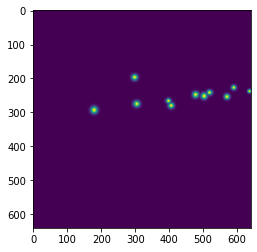

(0, 3)


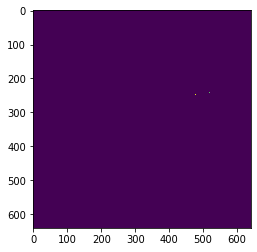

In [ ]:
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)
for data in train_loader:
    img=data['input'][0].permute(1,2,0)
    img=img*std+mean
    plt.imshow(img)
    plt.show()
    print(data['hm_norm'].shape)
    plt.imshow(data['hm_norm'][0][0])
    plt.show()
    plt.imshow(data['hm_small'][0][0])
    plt.show()
    indexs=np.argwhere(data['mask_norm'][0].numpy()==1)
    print(indexs.shape)
    wh_small=data['wh_small'][0][0]
    plt.imshow(wh_small)
    plt.show()
    for _,i,j in indexs:
        print('w is ',data['wh_norm'][0,0,i,j])
        print('h is ',data['wh_norm'][0,1,i,j])
    input('s')

In [8]:
train_data=Dataset(None, 'train')
test_data=Dataset(None, 'val')

In [23]:
count=0
cut=0
for i,boxes in enumerate(test_data.boxes):
    if len(boxes)>count:
        count=len(boxes)
        cut=i

In [24]:
print(count,cut)

709 870


In [21]:
train_data.fnames[3124]

'/public/widerface/WIDER/WIDER_train/images/2--Demonstration/2_Demonstration_Demonstrators_2_371.jpg'

In [13]:
train_boxes=train_data.boxes
count=0
num_32=0
num_64=0
num_128=0
num_256=0
num_512=0
num_1024=0
num_max=0
for index,boxes in enumerate(train_boxes):
    for box in boxes:
        w=box[2]-box[0]
        h=box[3]-box[1]
        if (w+h)/2<=32:
            num_32+=1
        elif (w+h)/2<=64:
            num_64+=1
        elif (w+h)/2<=128:
            num_128+=1
        elif (w+h)/2<=256:
            num_256+=1
        elif (w+h)/2<=512:
            num_512+=1
        elif (w+h)/2<=1024:
            num_1024+=1
        else:
            num_max+=1
            print(index)
            input('s')
print(count)

2211
s
7606
s
12851
s
0


In [17]:
print(train_data.fnames[12851])

/public/widerface/WIDER/WIDER_train/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_550.jpg


In [14]:
print(num_32,num_64,num_128,num_256,num_512,num_1024,num_max)

117060 25659 10588 4170 1584 329 3


In [9]:
len(test_data.boxes)

3222

In [19]:
test_boxes=test_data.boxes
count=0
num_32=0
num_64=0
num_128=0
num_256=0
num_512=0
num_1024=0
num_max=0
for index,boxes in enumerate(test_boxes):
    for box in boxes:
        w=box[2]-box[0]
        h=box[3]-box[1]
        if (w+h)/2<=32:
            num_32+=1
        elif (w+h)/2<=64:
            num_64+=1
        elif (w+h)/2<=128:
            num_128+=1
        elif (w+h)/2<=256:
            num_256+=1
        elif (w+h)/2<=512:
            num_512+=1
        elif (w+h)/2<=1024:
            num_1024+=1
        else:
            num_max+=1
            print(index)
            input('s')
print(count)

2410
s
0


In [20]:
print(num_32,num_64,num_128,num_256,num_512,num_1024,num_max)

28694 6672 2800 1077 381 72 1


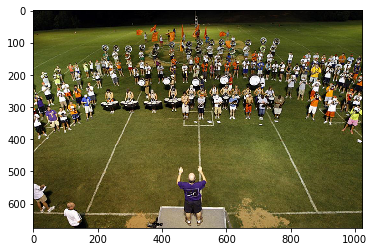

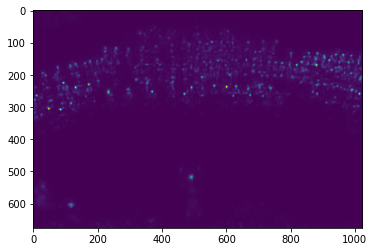

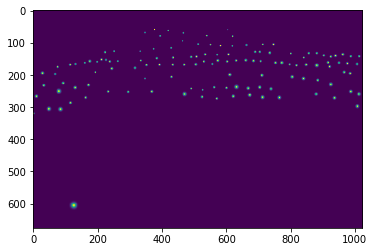

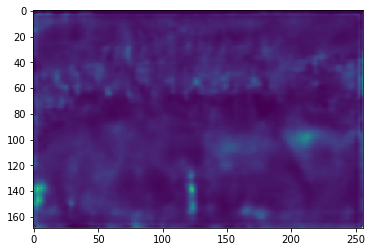

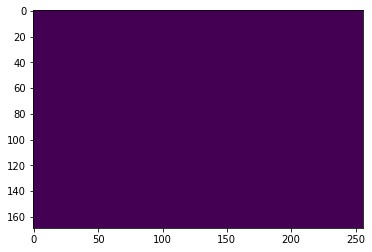

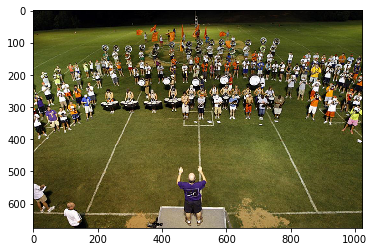

In [ ]:
def vis_pred(pred_heat,wh,large=False):
    p=0.1
    if large:
        p=0.3
    wh=_sigmoid(wh).numpy().copy()
    indexs=np.argwhere(pred_heat.numpy()>p)
    preds=[]
    lamba=1
    if large:
        lamba=4
    for i,j in indexs:
        preds.append([i*lamba,j*lamba,real_pixels(wh[0,i,j],large),real_pixels(wh[1,i,j],large)])
    return preds

from models.utils import _sigmoid
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
import torch.nn as nn
import cv2
import math
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)


COLORS = [((np.random.random((3, )) * 0.6 + 0.4)*255).astype(np.uint8) \
              for _ in range(2)]
def add_box(image, bbox,cat_id):
    color = np.array(COLORS[cat_id]).astype(np.int32).tolist()
#     if bbox[1] - cat_size[1] - 2 < 0:
#         cv2.rectangle(image,
#                       (bbox[0], bbox[1] + 2),
#                       (bbox[0] + cat_size[0], bbox[1] + cat_size[1] + 2),
#                       color, -1)
#     else:
#         cv2.rectangle(image,
#                       (bbox[0], bbox[1] - cat_size[1] - 2),
#                       (bbox[0] + cat_size[0], bbox[1] - 2),
#                       color, -1)
    bbox=[int(i) for i in bbox]
    cv2.rectangle(image,(bbox[0], bbox[1]),(bbox[2], bbox[3]),(255,0,0),2)
    return image

def draw_pic_hm(data,batch_output,batch_hm):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,output,hm in zip(data,batch_output,batch_hm):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        j=Image.fromarray(((pic.permute((1,2,0))*std+mean)*255).numpy().astype(np.uint8))
        j.save('src.jpeg')
        plt.show()
        for index,(out_hm) in enumerate(output):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(out_hm)
            plt.show()
            j=Image.fromarray(((out_hm.numpy()[:,:,np.newaxis].repeat(3,2)*255)).astype(np.uint8))
            j.save('output.jpg')
        plt.show()
        for index,(label_hm) in enumerate(hm):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
            j=Image.fromarray(((label_hm.numpy()[:,:,np.newaxis].repeat(3,2)*255)).astype(np.uint8))
            j.save('hm.jpg')
        plt.show()
def _nms(heat, kernel=3):
    pad = (kernel - 1) // 2

    hmax = nn.functional.max_pool2d(
        heat, (kernel, kernel), stride=1, padding=pad)
    keep = (hmax == heat).float()
    return keep*heat
model.eval()
rf_sizes=[[10,32],[32,64],[64,128],[128,384]]
def real_pixels(length,large=False):
    if not large:
        if length<=0.3:
            pixels=32*(length/0.3)
        elif length<=0.7:
            pixels=((length-0.3)/0.4)*96+32
        elif length<=0.9:
            pixels=((length-0.7)/0.2)*256+128
        else:
            pixels=((length-0.9)/0.08)*640+384
        return pixels
    else:
        if length<=0.3:
            pixels=(64*(length-0.1)/0.2)+64
        elif length<=0.8:
            pixels=((length-0.3)/0.5)*640+128
        else:
            pixels=((length-0.8)/0.2)*256+768
        return pixels
    
with torch.no_grad():
    for index,batch in enumerate(val_loader):
        data=batch['input']
        output,=model(data.cuda(0))
        hm_s=_sigmoid(output['hm_small'].cpu().detach()[0,0])
        hm_n=_sigmoid(output['hm_norm'].cpu().detach()[0,0])
        label_hm_s=batch['hm_small'][0,0]
        label_hm_n=batch['hm_norm'][0,0]
    #     hm=_nms(_sigmoid(hm_s))[0,0]
        img=((data[0].permute((1,2,0)).cpu()*std+mean)*255).numpy().astype(np.uint8).copy()
        plt.imshow(img)
        plt.show()
        plt.imshow(hm_s)
        plt.show()
        plt.imshow(label_hm_s)
        plt.show()
        plt.imshow(hm_n)
        plt.show()
        plt.imshow(label_hm_n)
        plt.show()
        wh_s=output['wh_small'].cpu().detach()[0]
        preds=vis_pred(_nms(hm_s.unsqueeze(0).unsqueeze(0))[0,0],wh_s)
        img_s=img.copy()
        for y,x,w,h in preds:
            add_box(img_s,[x-w/2,y-h/2,x+w/2,y+h/2],1)
        j=Image.fromarray(img_s)
        j.save('img_s.jpg')
        wh_n=output['wh_norm'].cpu().detach()[0]
        preds=vis_pred(_nms(hm_n.unsqueeze(0).unsqueeze(0))[0,0],wh_n,True)
        img_n=img.copy()
        
        for y,x,w,h in preds:
            add_box(img_n,[x-w/2,y-h/2,x+w/2,y+h/2],1)
        j=Image.fromarray(img_n)
        j.save('img_n.jpg')
        plt.imshow(img)
        plt.show()
        input('s')
        if len(preds)>=1:
            input('s')
#         for i in range(4):
#             label_wh=batch['wh'][0][i]
#             output_wh=output['wh'][0].cpu().detach()
#             output_wh=_sigmoid(output_wh)
#             mask=batch['mask'][0][i]
#             indexs=np.argwhere(mask.numpy()==1)
#             k=i
#             for (i,j),pred in zip(indexs,preds):
#                 print('number:',str(k),'w:',label_wh[0,i,j],'h:',label_wh[1,i,j],'real: w: ',real_pixels(label_wh[0,i,j],k),'h: ',real_pixels(label_wh[1,i,j],k))
#                 for z in range(4):
#                     print('output'+str(z)+':       ','w:',output_wh[z,0,i,j],'h:',output_wh[z,1,i,j],'real h:  ' ,real_pixels(output_wh[z,0,i,j],z),'w',real_pixels(output_wh[z,0,i,j],z))
#         input('s')

In [6]:

from models.utils import _sigmoid
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
import torch.nn as nn
import cv2
import math
import os.path as osp
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)


COLORS = [((np.random.random((3, )) * 0.6 + 0.4)*255).astype(np.uint8) \
              for _ in range(2)]
def vis_pred(pred_heat,wh):
    wh=_sigmoid(wh).numpy().copy()
    indexs=np.argwhere(pred_heat.numpy()>0.12)

    preds=[]
    for i,j in indexs:
        for k in range(4):
            if wh[k,0,i,j]<=0.8 and wh[k,1,i,j]<=0.8:
                preds.append([j,i,real_pixels(wh[k,0,i,j],k),real_pixels(wh[k,1,i,j],k),pred_heat[i,j]])
                break 
            elif k==3:
                preds.append([j,i,real_pixels(wh[k,0,i,j],k),real_pixels(wh[k,1,i,j],k),pred_heat[i,j]])
                break
    return preds
def add_box(image, bbox,cat_id):
    color = np.array(COLORS[cat_id]).astype(np.int32).tolist()
    bbox=[int(i) for i in bbox]
    cv2.rectangle(image,(bbox[0], bbox[1]),(bbox[2], bbox[3]),(255,0,0),2)
    return image

def draw_pic_hm(data,batch_output,batch_hm):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,output,hm in zip(data,batch_output,batch_hm):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        j=Image.fromarray(((pic.permute((1,2,0))*std+mean)*255).numpy().astype(np.uint8))
        j.save('src.jpeg')
        plt.show()
        for index,(out_hm) in enumerate(output):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(out_hm)
            plt.show()
            j=Image.fromarray(((out_hm.numpy()[:,:,np.newaxis].repeat(3,2)*255)).astype(np.uint8))
            j.save('output.jpg')
        plt.show()
        for index,(label_hm) in enumerate(hm):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
            j=Image.fromarray(((label_hm.numpy()[:,:,np.newaxis].repeat(3,2)*255)).astype(np.uint8))
            j.save('hm.jpg')
        plt.show()
def _nms(heat, kernel=3):
    pad = (kernel - 1) // 2

    hmax = nn.functional.max_pool2d(
        heat, (kernel, kernel), stride=1, padding=pad)
    keep = (hmax == heat).float()
    return keep*heat
rf_sizes=[[10,32],[32,64],[64,128],[128,384]]
def real_pixels(length,index):
    pixels=((length-0.2)/0.6)*(rf_sizes[index][1]-rf_sizes[index][0])+rf_sizes[index][0]
    return float(pixels)
testset=Dataset(None, 'val')
save_path='./hhhhh'
with torch.no_grad():
    for batch,i in zip(val_loader,range(len(testset))):
        data=batch['input']
        output,=model(batch['input'].cuda(0))
        
        hm=output['hm'].cpu().detach()
        wh=output['wh'][0].cpu().detach()
        del output
        hm=_nms(_sigmoid(hm))[0,1]

        preds=vis_pred(hm,wh)
        fname=testset.fnames[i].split('images/')[-1].split(' ')[0]

        ftxt=fname.split('.jpg')[0]+'.txt'
        dir_f=osp.join(save_path,ftxt.split('/')[0])
        if not osp.exists(dir_f):
            print(dir_f)
            os.mkdir(dir_f)
        f = open(osp.join(save_path,ftxt), 'w')
        f.write('{:s}\n'.format(fname))
        f.write('{:d}\n'.format(len(preds)))
        for x,y,w,h,p in preds:
            xmin = np.floor(x-w/2)
            ymin = np.floor(y-h/2)
            w=np.ceil(w)
            h=np.ceil(h)
            f.write('{:.1f} {:.1f} {:.1f} {:.1f} {:.3f}\n'.
                       format(xmin, ymin, w, h, p))
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
./hhhhh/1--Handshaking
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
./hhhhh/10--People_Marching
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
./hhhhh/11--Meeting
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
./hhhhh/12--Group
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
2

1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
./hhhhh/36--Football
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
./hhhhh/37--Soccer
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
./hhhhh/38--Tennis
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
./hhhhh/39--Ice_Skating
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
19

In [ ]:
def write_func():
    # evaluation
    image = testset.pull_image(i)
    img_id, annotation = testset.pull_anno(i)
    event = testset.pull_event(i)
    print('Testing image {:d}/{:d} {}....'.format(i+1, num_images , img_id))
    #max_im_shrink = ( (2000.0*2000.0) / (img.shape[0] * img.shape[1])) ** 0.5
    max_im_shrink = (0x7fffffff / 200.0 / (image.shape[0] * image.shape[1])) ** 0.5 # the max size of input image for caffe
    max_im_shrink = 3 if max_im_shrink > 3 else max_im_shrink

    shrink = max_im_shrink if max_im_shrink < 1 else 1

    det0 = detect_face(image, shrink)  # origin test
    det1 = flip_test(image, shrink)    # flip test
    [det2, det3] = multi_scale_test(image, max_im_shrink)#min(2,1400/min(image.shape[0],image.shape[1])))  #multi-scale test
    det4 = multi_scale_test_pyramid(image, max_im_shrink)
    det = np.row_stack((det0, det1, det2, det3, det4))

    dets = bbox_vote(det)
    #vis_detections(i ,image, dets , 0.8)         

    if not os.path.exists(save_path + event):
        os.makedirs(save_path + event)
    f = open(save_path + event + '/' + img_id.split(".")[0] + '.txt', 'w')
    write_to_txt(f, dets , event, img_id)

In [ ]:
import torch.nn as nn
class FaL2Loss(nn.Module):
    def __init__(self):
        super(FaL2Loss, self).__init__()
        self.l2loss=torch.nn.MSELoss(reduction='sum')
    def forward(self, outputs, masks, targets):
        loss=0.0
        mask_sum=0.0
        for output,mask,target in zip(outputs,masks,targets):
            loss+= self.l2loss(output * mask, target * mask)
            mask_sum+=mask.sum()
        loss=loss/(mask_sum+1e-4)
        return loss
def _neg_loss(pred, gt):
    ''' Modified focal loss. Exactly the same as CornerNet.
        Runs faster and costs a little bit more memory
      Arguments:
        pred (batch x c x h x w)
        gt_regr (batch x c x h x w)
    '''
    pos_inds = gt.eq(1).float()
    neg_inds = gt.lt(1).float()

    neg_weights = torch.pow(1 - gt, 4)

    loss = 0
    pos_loss = torch.log(pred+1e-12) * torch.pow(1 - pred, 2) * pos_inds
    neg_loss = torch.log(1 - pred+1e-12) * torch.pow(pred, 2) * \
        neg_weights * neg_inds

    num_pos = pos_inds.float().sum()
    pos_loss = pos_loss.sum()
    neg_loss = neg_loss.sum()
    print('neg',neg_loss)
    print('pos',pos_loss)
    print('num',num_pos)
    if num_pos == 0:
        loss = loss - neg_loss
        print('yes')
    else:
        print('oo')
        loss = loss - (pos_loss + neg_loss) / num_pos
    return loss
class MultiFocalLoss(nn.Module):
    '''nn.Module warpper for focal loss'''

    def __init__(self):
        super(MultiFocalLoss, self).__init__()
        self.neg_loss = _neg_loss

    def forward(self, outs,masks,targets):
        loss=0.0
        mask_sum=0.0
        for out,target,mask in zip(outs,targets,masks):
            loss+=self.neg_loss(out,target)*mask.sum()         
            mask_sum+=mask.sum()
        print(loss)
        loss=loss/(mask_sum+1e-4)
        return loss

In [ ]:
loss_func2=MultiFocalLoss()

In [ ]:
loss_func=FaL2Loss()

In [ ]:
for data in train_loader:
    plt.imshow(data['input'][0].permute(1,2,0))
    plt.show()
    mask=data['mask']
    wh=data['wh']
    data['target']=data['target']*640
    loss=loss_func(data['offset'],data['mask'],data['wh'])
    print(loss)
    loss_wh=loss_func2(data['hm'],data['mask'],data['hm'])
    print('loss_wh',loss_wh)
    print((data['target'][0,0][3]-data['target'][0,0][1]),(data['target'][0,0][2]-data['target'][0,0][0]))
    for i in range(4):
        indexs=np.argwhere(mask[i]==1)
        print(indexs.shape)
        print(indexs)
        for a,b,c,d in indexs.transpose(0,1):
            print(wh[i][a,0,c,d])
            print(wh[i][a,1,c,d])
        plt.imshow(data['hm'][i][0,1])
        plt.show()
        print(data['hm'][i].sum())
    input('s')

In [ ]:
for data in val_loader:
    img=data['input']
    img=img.cuda()
    output=net(img)
    input('s')

In [ ]:
label_wh=batch['wh']
output_wh=output['wh']
mask=batch['mask']

In [ ]:
indexs=np.argwhere(mask==1)

In [ ]:
print(indexs.shape)

In [ ]:
for _,_,i,j in indexs.transpose(0,1):
    print('w:',label_wh[0,0,i,j].cpu().numpy(),'h:',label_wh[0,1,i,j].cpu().numpy(),'output:       ','w:',output_wh[0,0,i,j].cpu().detach().numpy(),'h:',output_wh[0,1,i,j].cpu().detach().numpy())

In [ ]:
output=output[0]
output['hm']

In [ ]:
from utils.widerface import WIDERDetection, detection_collate
from utils.config import cfg
from torch.utils.data import DataLoader, Dataset
train_dataset = WIDERDetection(cfg.FACE.TRAIN_FILE, mode='train')

val_dataset = WIDERDetection(cfg.FACE.VAL_FILE, mode='val')

train_loader = DataLoader(train_dataset, 5,
                               num_workers=1,
                               shuffle=True,
#                                collate_fn=detection_collate,
                               pin_memory=True)
val_batchsize = 5
val_loader = DataLoader(val_dataset, 1,
                             num_workers=0,
                             shuffle=False,
#                              collate_fn=,
                             pin_memory=True)


In [ ]:
for k in val_loader:
    input('s')

In [ ]:
for n,v in k.items():
    print(n,v.shape)

In [ ]:
from models.losses import FaL1Loss
crit_reg = FaL1Loss()
img=k['input']
wh=k['wh']
hm=k['hm']
mask=k['mask']
offset=k['offset']

In [ ]:
import torch
print(wh.shape)

In [ ]:
crit_reg(torch.ones(1,2,640,640),mask,wh)

In [ ]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
print(offset[0,0,99,320])
# print((hm[:,1,:,:]==1).sum())
# im = Image.fromarray((hm[:,1,:,:].numpy().transpose(1,2,0).repeat(3,2)*255).astype(np.uint8))
# im.save("your_file.jpeg")
# plt.figure(figsize=(320,320))
# plt.imshow(hm[0,1,:,:])
# plt.show()
# plt.imshow(mask[0,0,:,:])

In [ ]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
mean=torch.tensor([123., 117.,104.])
mean=mean.reshape(1,1,3)
print(img.shape)
pic=img[0].permute(1,2,0)
print(pic.shape)
pic=pic+mean/255
print(pic.shape)
plt.imshow(pic)
plt.show()
print(mask[0][0][200:300,:30])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
mean=torch.tensor([123., 117.,104.])
print(mean)
mean=mean.reshape(1,1,3)
print(k[0][1])
img=k[0][1].permute((1,2,0))
print(img+mean)
plt.imshow((img+mean).int())
plt.show()

In [ ]:
k[0].shape

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)
def draw_pic_hm(data,hm_inter,hm_bound):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,inter,bound in zip(data,hm_inter,hm_bound):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        plt.show()
        print((inter==1).sum())
        print((bound==1).sum())
        for index,(label_hm) in enumerate(inter):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
        plt.show()
        for index,(label_hm) in enumerate(bound):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
        plt.show()
for index,batch in enumerate(train_loader):
    
    draw_pic_hm(batch['input'],batch['hm_inter'],batch['hm_bound'])
    input('s')

In [ ]:
from models.model import create_model
import torch
heads = {'hm': 20,'wh': 2,'reg': 2 }
model = create_model('deeplab_resnet101',heads ,64)
state_dict=torch.load('/home/mayx/project/github/CenterNet/exp/ctdet/pascal_resnet18_inter_bound_rehm/model_last.pth')
for k,v in state_dict.items():
    print(k)
    if 'epoch' in k:
        print(v)
params=state_dict['state_dict']
model.cuda(0)
model.load_state_dict(params)

In [ ]:
from models.utils import _sigmoid
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,1,3)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,1,3)
def draw_pic_hm(data,batch_output,batch_hm):
    classes=["aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", 
"horse", "motorbike", "person", "pottedplant", "sheep", "sofa", 
"train", "tvmonitor"]
    for pic,output,hm in zip(data,batch_output,batch_hm):
        plt.imshow(((pic.permute((1,2,0))*std+mean)*255).int())
        plt.show()
        for index,(out_hm) in enumerate(output):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(out_hm)
        plt.show()
        for index,(label_hm) in enumerate(hm):
            plt.subplot(4,5,index+1)
            plt.title(classes[index])
            plt.imshow(label_hm)
        plt.show()
model.eval()
for index,batch in enumerate(val_loader):
    data=batch['input'][:2]
    data=data.cuda(0)
    data=data[:,(2,1,0),:,:]
    output,=model(data)
    draw_pic_hm(data.cpu().detach(),_sigmoid(output['hm'].cpu().detach()),batch['hm'][:1].cpu().detach())
#     print(output['wh'],output['wh'].shape)
#     print(output['reg'],output['reg'].shape)
#     print(batch['reg_mask'][:1],batch['reg_mask'][:1].shape)
    input('s')

In [ ]:
print(batch['wh'][0])
print(batch['ind'][0])
print(batch['reg_mask'][0])
wh=output['wh'][0]
index=input('S')
print(wh)
wh=wh.view(2,-1)
print(wh[:,int(index)])
# print(wh.shape)
          

In [ ]:
from models.losses import RegL1Loss, RegLoss, NormRegL1Loss, RegWeightedL1Loss
crit_reg = RegL1Loss()
crit_reg(output['wh'][:2], batch['reg_mask'][:2].cuda(2),batch['ind'][:2].cuda(2), batch['wh'][:2].cuda(2))